# Progetto: Video games dataset (9)

Miggiano Davide - 4840761

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sb #Heat map
from prettytable import PrettyTable
from sklearn import metrics # Calcolo errore per Linear Regression

#!pip install scipy==1.7.0
import scipy
print (scipy.__version__)

1.7.0


**Dateset Video Games**

Il dataset Video_Games contiene un campione di video giochi rilasciati tra il 1980 e il 2020.

Dati campionati da [VGChartz](https://www.vgchartz.com/) e [Metacritic](https://www.metacritic.com/)

> Domanda cardine del progetto: "***Cosa ha causato l'impennata nelle vendite tra il 2000 e il 2010 e le vendite nelle diverse regioni del mondo sono correlate?***"

In [ ]:
#Importiamo il dataset
games = pd.read_csv('Video_Games.csv')
games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


- **Name**: Nome del gioco 
- **Platform**: Piattaforma di rilascio (lo stesso gioco può essere rilasciato su piattaforme diverse)
- **Year_of_Release**: Anno di uscita
- **Genre**: Genere del gioco
- **Publisher**: Casa editrice
- **NA_Sales**: Vendite in Nord America
- **EU_Sales**: Vendite in Europa
- **JP_Sales**: Vendite in Giappone
- **Other_Sales**: Altre vendite
- **Global_Sales**: Vendite nel mondo
- **Critic_Score**: Voto dei giornalisti su metacritic
- **Critic_Count**: Numero di voti dei giornalisti su metacritic
- **User_Score**: Voto degli utenti su Metacritic
- **User_Count**: Numero di voti degli utenti su metacritic
- **Developer**: Casa di sviluppo
- **Rating**: sistema di classificazione dei videogiochi, valutazione di quanto ogni videogioco introdotto sul mercato sia adatto ai giocatori, a seconda della loro età

(Tutte le vendite sono in miliardi) 

## Operazioni preliminari

Facciamoci un'idea sulla dimensione del dataset

In [ ]:
print("Righe:",games.shape[0],"\nFeatures:",games.shape[1])

print("\nNumero di valori univoci per ogni features:\n--------------------------")
print(games.nunique())

Righe: 16719 
Features: 16

Numero di valori univoci per ogni features:
--------------------------
Name               11562
Platform              31
Year_of_Release       39
Genre                 12
Publisher            581
NA_Sales             402
EU_Sales             307
JP_Sales             244
Other_Sales          155
Global_Sales         629
Critic_Score          82
Critic_Count         106
User_Score            96
User_Count           888
Developer           1696
Rating                 8
dtype: int64


Dividiamo il dataset in features qualitative e quantitative, così da determinare i tipi di dati a nostra disposizione

In [ ]:
qualitative = games[['Name', 'Platform', 'Genre', 'Publisher', 'Developer', 'Rating']]
quantitative = games[['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']]

Utilizziamo il metodo describe() di pandas per calcolare alcuni dati statistici

In [ ]:
quantitative.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


Possiamo estrapolare alcune informazioni di base:
- I giochi del dataset sono stati rilasciati tra il 1980 e il 2020.
- Le vendite in Nord America sono mediamente superiori rispetto agli altri paesi.
- Abbiamo dei valori nulli nelle colonne "Year_of_Release", "Critic/User_Score/Count"

In [ ]:
qualitative.describe()

,Name,Platform,Genre,Publisher,Developer,Rating
count,16717,16719,16717,16665,10096,9950
unique,11562,31,12,581,1696,8
top,Need for Speed: Most Wanted,PS2,Action,Electronic Arts,Ubisoft,E
freq,12,2161,3370,1356,204,3991


Anche qui possiamo vedere come:
- La piattaforma più frequente sia la PS2
- e il genere più frequente sia l'Action

Controlliamo la quantità di valori mancanti per ogni features del dataset

In [ ]:
games.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

## Rimuoviamo i valori nulli

Prendiamo in considerazione prima di tutto le colonne "Name" e 'Publisher', che avendo rispettivamente solo 2 e 54 righe con valori nulli (su 11562 uniche) non causano grande perdita di infromazioni, quindi possiamo pensare di rimuoverle.

In [ ]:
games.drop(games[games.Name.isnull()].index, inplace=True)
games.drop(games[games.Publisher.isnull()].index, inplace=True)

Nelle features relative ai voti ed al loro numero abbiamo molti valori nulli, quindi possiamo prendere due approcci diversi:
1. Possiamo provare a completare i valori nulli con la media dei valori delle singole colonne... (games)
2. oppure possiamo rimuovere le righe (games_no_meanScore)

In [ ]:
# Opzione (2)
# Facciamo la copia del dataset prima di rimuovere le righe nulle
games_no_meanScore = games.copy()

# Rimuoviamo le righe nulle dei punteggi dalla copia del dataset
games_no_meanScore.drop(games_no_meanScore[games_no_meanScore.Critic_Score.isnull()].index, inplace=True)
games_no_meanScore.drop(games_no_meanScore[games_no_meanScore.Critic_Count.isnull()].index, inplace=True)
games_no_meanScore.drop(games_no_meanScore[games_no_meanScore.User_Score.isnull()].index, inplace=True)
games_no_meanScore.drop(games_no_meanScore[games_no_meanScore.User_Count.isnull()].index, inplace=True)

Dataset: 
- games: lo utilizzeremo per la maggior parte delle operazioni, specilamente quelle che non implicano l'utilizzo delle feature dei voti.
- games_no_meanScore: lo utilizzeremo quando saranno necessarie operazioni sui voti. 

Converto la feature "User_Score" da stringa a float per usi successivi

In [ ]:
#Trasformo la stringa 'tbd' (To be Defined) in NaN prima della conversione
games['User_Score']=games.User_Score.replace('tbd',np.nan).astype(float)
games_no_meanScore['User_Score']=games_no_meanScore.User_Score.replace('tbd',np.nan).astype(float)

#Trasformo la feature User_Score da obj a float
games['User_Score'] = games['User_Score'].astype(float)
games_no_meanScore['User_Score'] = games_no_meanScore['User_Score'].astype(float)

Completiamo i valori nulli con la media dei valori delle singole colonne

In [ ]:
#Critic
avg_critic_score = games['Critic_Score'].mean()
avg_critic_count = games['Critic_Count'].mean()
games['Critic_Score'].fillna(avg_critic_score, inplace = True)
games['Critic_Count'].fillna(avg_critic_count, inplace = True)

#User
avg_user_score = games['User_Score'].mean()
avg_user_count = games['User_Count'].mean()
games['User_Score'].fillna(avg_user_score, inplace = True)
games['User_Count'].fillna(avg_user_count, inplace = True)

t = PrettyTable(['Type','Avg Score','Avg Count'])
t.add_row(["Critic", avg_critic_score, avg_critic_count])
t.add_row(["User", avg_user_score, avg_user_count])
print(t)

+--------+-------------------+--------------------+
|  Type  |     Avg Score     |     Avg Count      |
+--------+-------------------+--------------------+
| Critic | 68.97307266691257 | 26.360260666420753 |
|  User  | 7.125936181434649 | 162.23958333333334 |
+--------+-------------------+--------------------+


Per la data di rilascio la converto in valori interi e sostituisco i valori NaN con la media

In [ ]:
games['Year_of_Release'] = games['Year_of_Release'].fillna(games['Year_of_Release'].mean()).astype(int)
games_no_meanScore['Year_of_Release'] = games_no_meanScore['Year_of_Release'].fillna(games_no_meanScore['Year_of_Release'].mean()).astype(int)

Confrontiamo il numero di valori nulli nei due dataset dopo le modifiche

In [ ]:
t = PrettyTable(['Feature', 'Normal', 'No mean score'])
t.add_row(["Name", games.isnull().sum()[0], games_no_meanScore.isnull().sum()[0]])
t.add_row(["Platform", games.isnull().sum()[1], games_no_meanScore.isnull().sum()[1]])
t.add_row(["Year_of_Release", games.isnull().sum()[2], games_no_meanScore.isnull().sum()[2]])
t.add_row(["Genre", games.isnull().sum()[3], games_no_meanScore.isnull().sum()[3]])
t.add_row(["Publisher", games.isnull().sum()[4], games_no_meanScore.isnull().sum()[4]])
t.add_row(["NA_Sales", games.isnull().sum()[5], games_no_meanScore.isnull().sum()[5]])
t.add_row(["EU_Sales", games.isnull().sum()[6], games_no_meanScore.isnull().sum()[6]])
t.add_row(["JP_Sales", games.isnull().sum()[7], games_no_meanScore.isnull().sum()[7]])
t.add_row(["Other_Sales", games.isnull().sum()[8], games_no_meanScore.isnull().sum()[8]])
t.add_row(["Global_Sales", games.isnull().sum()[9], games_no_meanScore.isnull().sum()[9]])
t.add_row(["Critic_Score", games.isnull().sum()[10], games_no_meanScore.isnull().sum()[10]])
t.add_row(["Critic_Count", games.isnull().sum()[11], games_no_meanScore.isnull().sum()[11]])
t.add_row(["User_Score", games.isnull().sum()[12], games_no_meanScore.isnull().sum()[12]])
t.add_row(["User_Count", games.isnull().sum()[13], games_no_meanScore.isnull().sum()[13]])
t.add_row(["Developer", games.isnull().sum()[14], games_no_meanScore.isnull().sum()[14]])
t.add_row(["Rating", games.isnull().sum()[15], games_no_meanScore.isnull().sum()[15]])
print(t)

+-----------------+--------+---------------+
|     Feature     | Normal | No mean score |
+-----------------+--------+---------------+
|       Name      |   0    |       0       |
|     Platform    |   0    |       0       |
| Year_of_Release |   0    |       0       |
|      Genre      |   0    |       0       |
|    Publisher    |   0    |       0       |
|     NA_Sales    |   0    |       0       |
|     EU_Sales    |   0    |       0       |
|     JP_Sales    |   0    |       0       |
|   Other_Sales   |   0    |       0       |
|   Global_Sales  |   0    |       0       |
|   Critic_Score  |   0    |       0       |
|   Critic_Count  |   0    |       0       |
|    User_Score   |   0    |       0       |
|    User_Count   |   0    |       0       |
|    Developer    |  6576  |       4       |
|      Rating     |  6720  |       70      |
+-----------------+--------+---------------+


Cerchiamo di capire se le vendite dipendo tra di loro o meno

## **Quali sono state le vendite nei diversi paesi negli anni?** 

Prima di tutto vediamo l'andamento delle vendite in tutto il mondo nei diversi anni

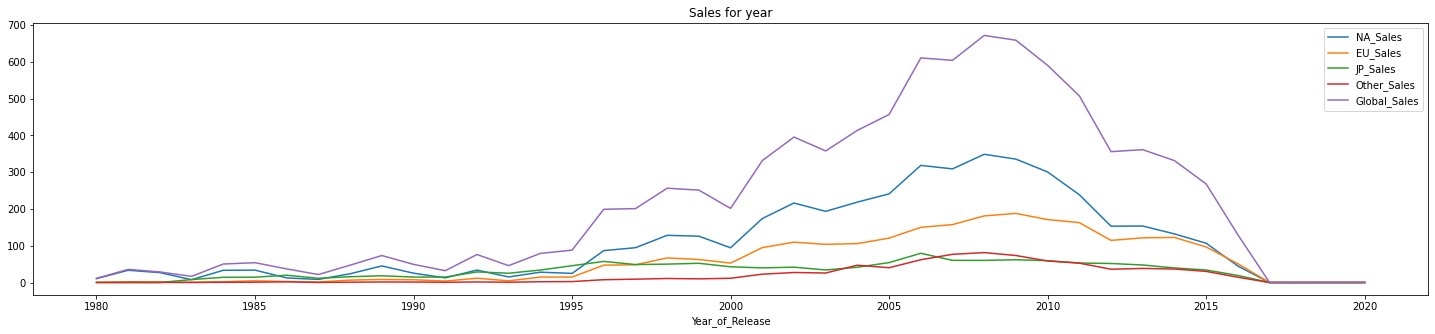

In [ ]:
sales = games.groupby('Year_of_Release')[['NA_Sales','EU_Sales', 'JP_Sales','Other_Sales','Global_Sales']].sum()
sales.plot(kind='line', title = 'Sales for year', figsize = (25,5), legend=True)

Possiamo facilmente notare come le vendite a livello globale abbiano iniziato la loro crescita a partire dal 1995, continuando fino al 2012 circa.

Con questa informazione potremmo concentrare le nostre ricerche nell'arco di questi 17 anni per cercare di capire cosa abbia causato la crescita così improssiva di questo medium.

Notiamo inoltre che dal 2017 circa c'è stato un crollo totale delle vendite, dobbiamo capire se è dovuto a un evento in particolare o se è un errore causato dal nostro dataset.

## ***Quanti giochi sono stati rilasciati per anno?***

Vediamo ora quanti giochi sono stati rilasciati ogni anno per vedere se c'è stata qualche anomalia nelle uscite

In [ ]:
years = games.groupby('Year_of_Release')['Name'].count()
years

Year_of_Release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     743
2005     934
2006    1253
2007    1196
2008    1427
2009    1426
2010    1253
2011    1133
2012     653
2013     544
2014     581
2015     606
2016     500
2017       3
2020       1
Name: Name, dtype: int64

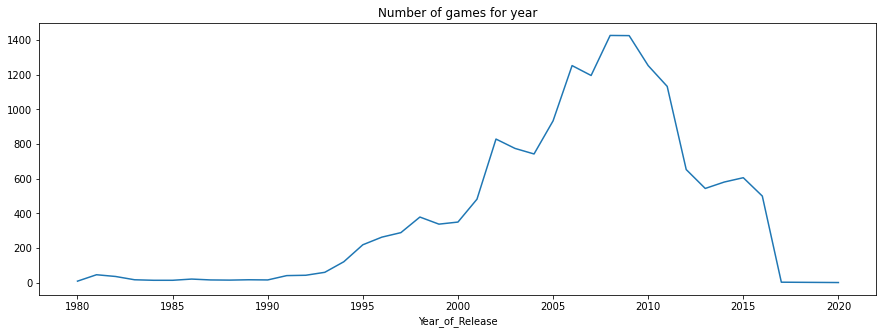

In [ ]:
years.plot(kind = 'line', title = 'Number of games for year', figsize = (15,5))

Dal grafico e dalla stampa precedente possiamo notare come:
- manchino del tutto giochi rilasciati negli anni 2018 e 2019 
- nel 2017 siano presenti solo tre giochi, mentre nel 2020 solo uno.

Questo ci conferma che lo strano crollo delle vendite è dovuto alla mancanza di dati nel dataset più che ad avvenimenti particolari nel mercato

Cerchiamo invece di capire quale potrebbe essere stata la causa della crescita dei giochi rilasciati tra il 2000 e il 2010

In [ ]:
games_in_range = games[games['Year_of_Release']>=2000][games['Year_of_Release']<=2010]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


## ***Qual'è la distribuzione dei giochi per le diverse piattaforme?***

Controlliamo il numero di giochi rilasciati per le diverse piattaforme 

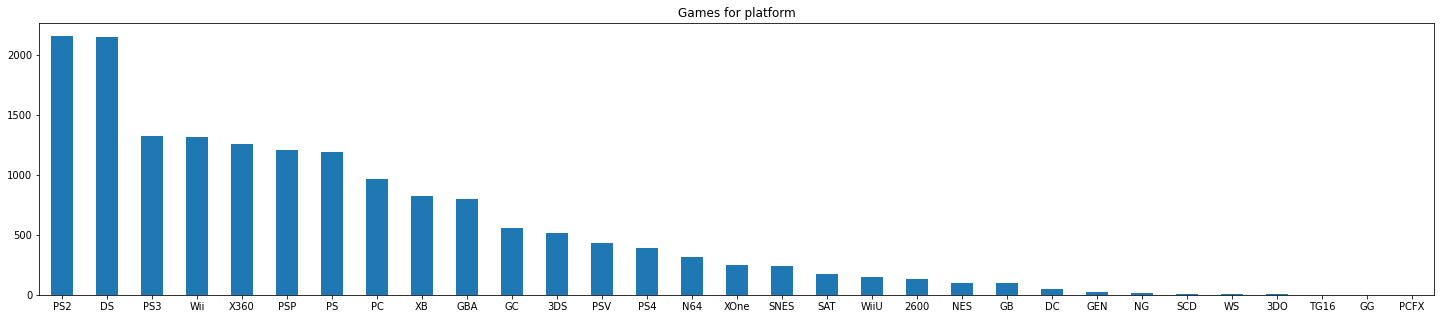

In [ ]:
games['Platform'].value_counts().plot(kind='bar', title = 'Games for platform', figsize = (25,5), rot=0)

Restringiamo solo ai giochi usciti tra il 2000 e il 2010 per capire se l'impennata delle vendite dipende dall'uscita di una specifica piattaforma

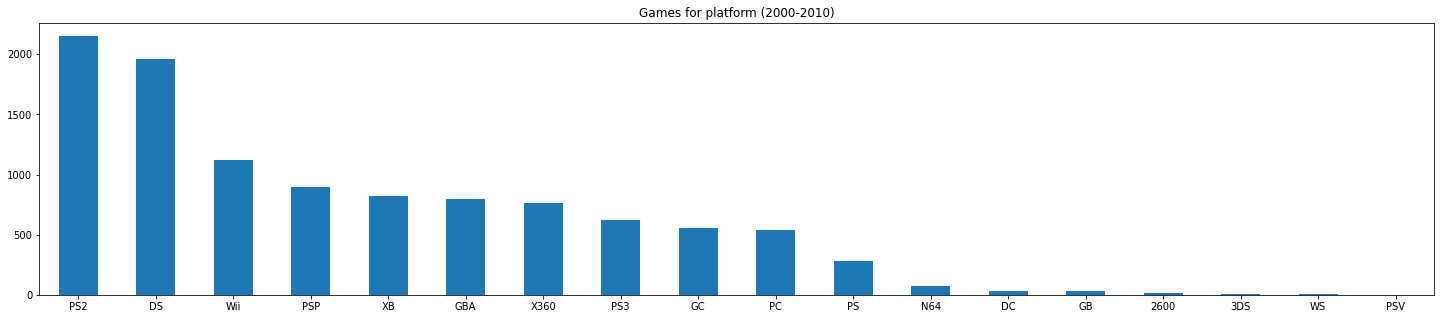

In [ ]:
games_in_range['Platform'].value_counts().plot(kind='bar', title = 'Games for platform (2000-2010)', figsize = (25,5), rot=0)

Possiamo notare come le piattaforme con il maggior numero di giochi presenti sul nostro dataset rimangano la PS2 e il DS, questo potrebbe essere dovuto al fatto che entrambe le console siano uscite in questo arco temporale, rispettivamente nel 2000 e nel 2004.

## ***Quale è stata la piattaforma con il maggior numero di vendite a livello globale?***

Controlliamo ora il numero di vendite a livello globale per ogni piattaforma

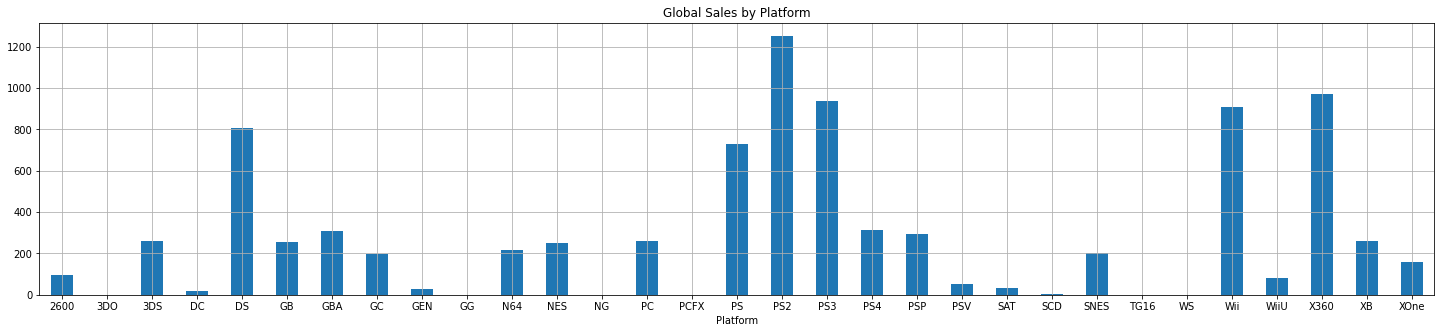

In [ ]:
games.groupby('Platform')['Global_Sales'].sum().plot(kind='bar', title = 'Global Sales by Platform', figsize = (25,5), rot=0, grid=True)

Come prima restringiamo il nostro caso agli anni tra il 2000 e il 2010

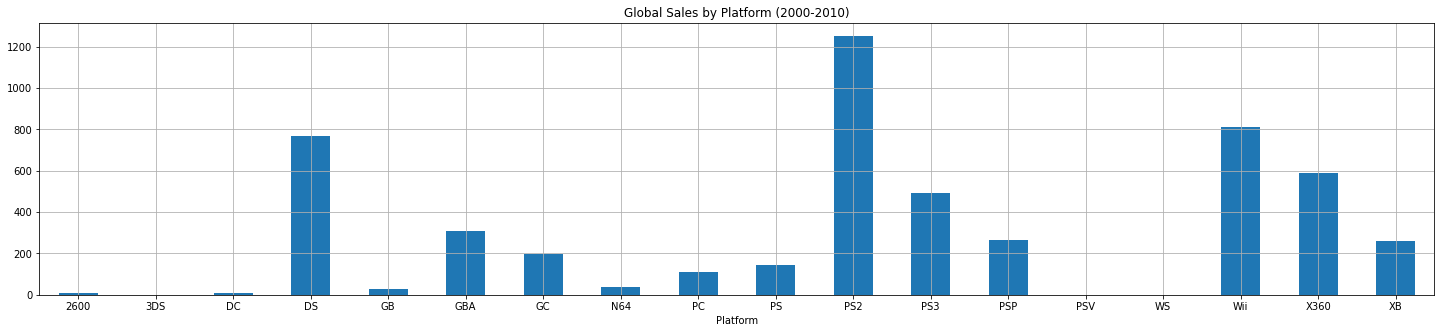

In [ ]:
games_in_range.groupby('Platform')['Global_Sales'].sum().plot(kind='bar', title = 'Global Sales by Platform (2000-2010)', figsize = (25,5), rot=0, grid=True)

Possiamo notare come alcune piattaforme che hanno venduto di più rientrino in questo arco temporale, con molta probabilità questo è dovuto al fatto che la PS2 sia uscita nel 2000, il DS nel 2004 e la Wii nel 2006 e che queste tre console siano ancora oggi tra le console con il maggior numero di pezzi venduti.

[List of best-selling game consoles](https://en.wikipedia.org/wiki/List_of_best-selling_game_consoles)

## ***Quale è stata la distribuzione dei generi?***

Vediamo ora il numero di giochi rilasciati per ogni genere

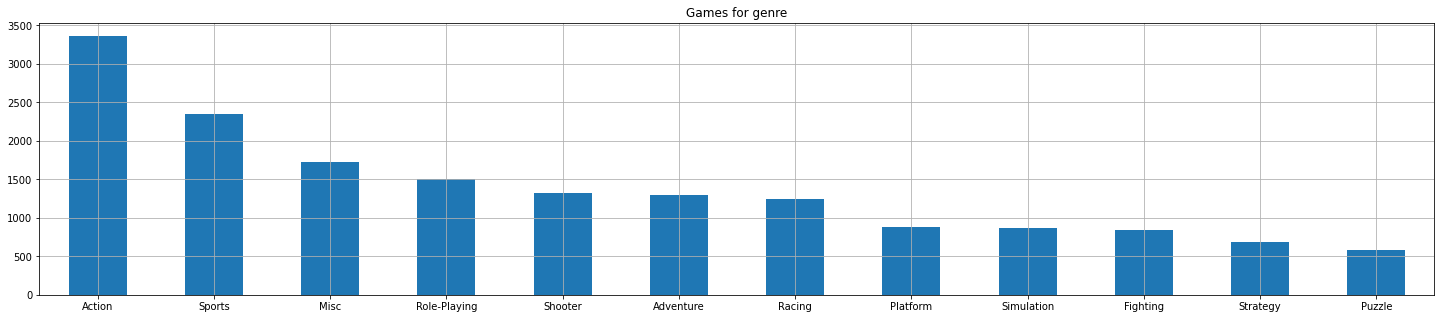

In [ ]:
games['Genre'].value_counts().plot(kind='bar', title = 'Games for genre', figsize = (25,5), rot=0, grid=True)

Controlliamo se i generi per cui sono usciti più giochi sono anche quelli che hanno venduto maggiormente 

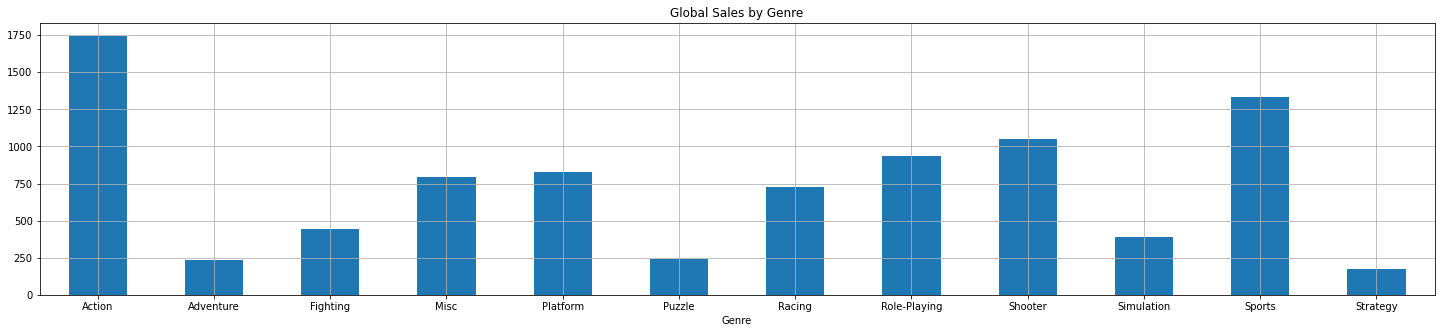

In [ ]:
games.groupby('Genre')['Global_Sales'].sum().plot(kind='bar', title = 'Global Sales by Genre', figsize = (25,5), rot=0, grid=True)

Possiamo notare come i generi più rilasciati siano anche quelli con le vendite più elevate.</br></br>
Controlliamo ora le vendite dei generi tra il 2000 e il 2010

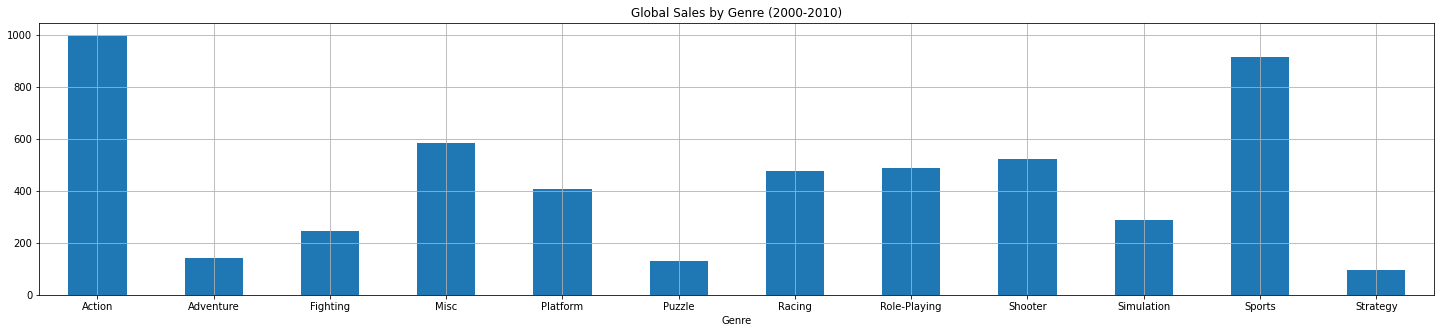

In [ ]:
games_in_range.groupby('Genre')['Global_Sales'].sum().plot(kind='bar', title = 'Global Sales by Genre (2000-2010)', figsize = (25,5), rot=0, grid=True)

I generi di punta per vendite globali rimangono comunque gli Action e gli Sports, controlliamo se questo vale in generale per tutte le regioni geografiche presenti sul dataset oppure no

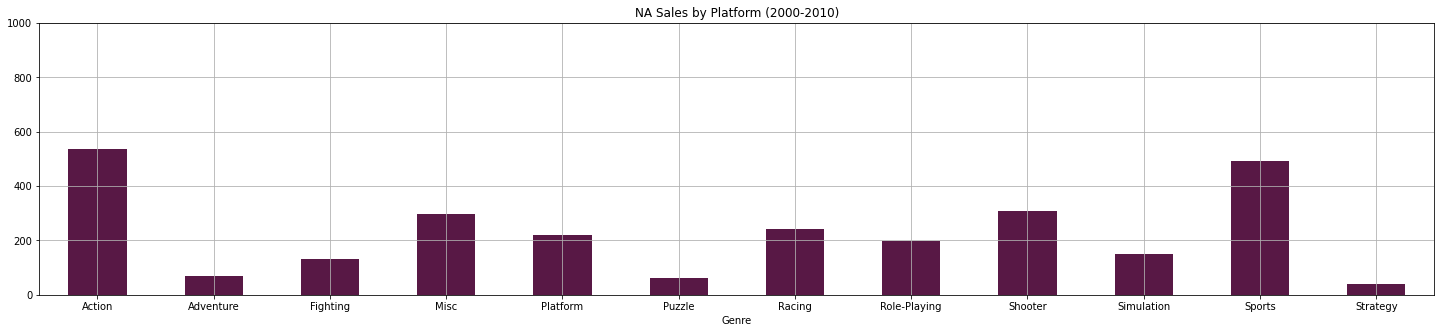

In [ ]:
games_in_range.groupby('Genre')['NA_Sales'].sum().plot(kind='bar', color='#581845', title = 'NA Sales by Platform (2000-2010)', figsize = (25,5), rot=0, grid=True, ylim=(0,1000))

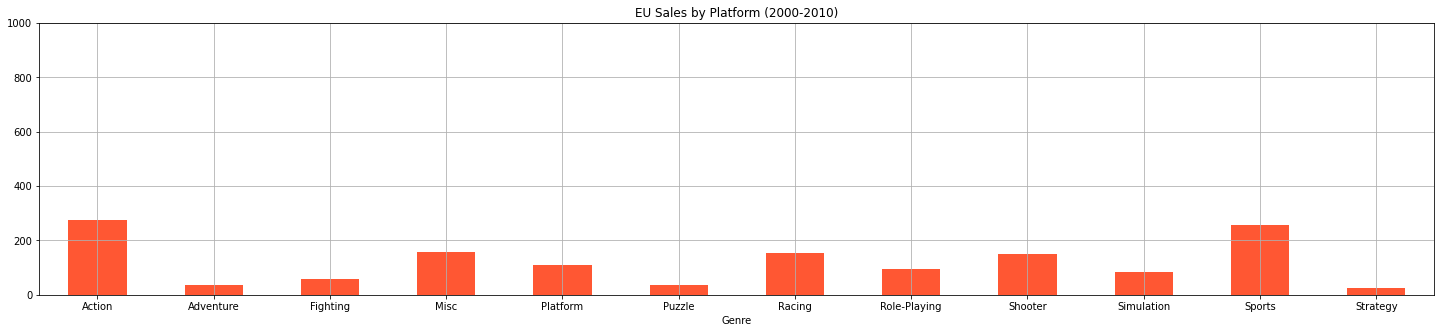

In [ ]:
games_in_range.groupby('Genre')['EU_Sales'].sum().plot(kind='bar', color='#FF5733', title = 'EU Sales by Platform (2000-2010)', figsize = (25,5), rot=0, grid=True,ylim=(0,1000))

Possiamo notare come in NA e EU le vendite dei generi siano molto simili e vedono negli Action e negli Sportivi i generi di punta.

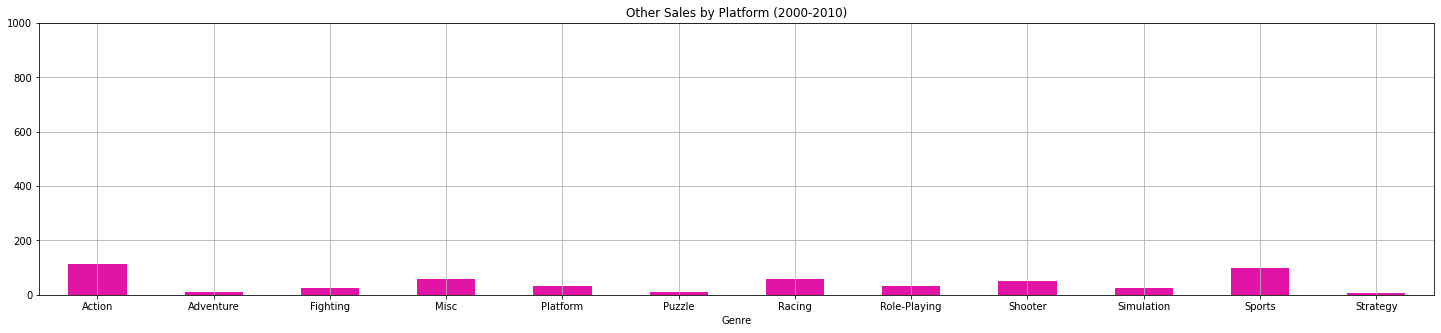

In [ ]:
games_in_range.groupby('Genre')['Other_Sales'].sum().plot(kind='bar', color='#E214A6', title = 'Other Sales by Platform (2000-2010)', figsize = (25,5), rot=0, grid=True,ylim=(0,1000))

Negli altri paesi (non ben specificati) possiamo notare come le vendite dei generi si avvicinino di più le une alle altre, ma anche in questo caso rimangano preponderanti gli Action e Sports

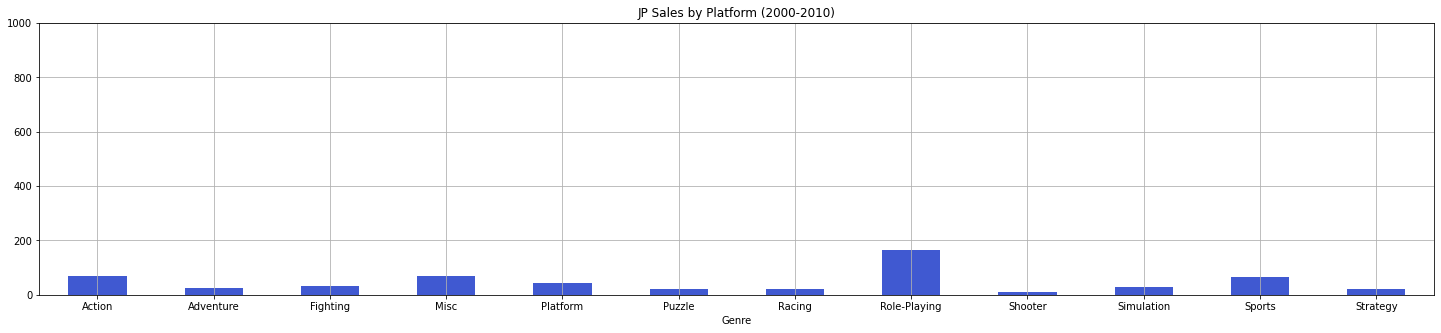

In [ ]:
games_in_range.groupby('Genre')['JP_Sales'].sum().plot(kind='bar', color='#4059D1', title = 'JP Sales by Platform (2000-2010)', figsize = (25,5), rot=0, grid=True,ylim=(0,1000))

Mentre in Giappone vediamo come il genere preponderante sia quello dei giochi di ruolo, forse dato dal fatto che si tratta della terra natale dei giochi di Pokémon e Final Fantasy

## **Numero di giochi per genere rilasciati dalle case di sviluppo**

Chiediamoci quanti giochi hanno rilasciato i Publisher (che hanno rilasciato più giochi della media) per ogni genere 

In [ ]:
# Compagnie
print("Numero di compagnie:",games.Publisher.nunique())

Numero di compagnie: 581


In [ ]:
#publisher_list = games.Publisher.unique()
genre_list = games.Genre.unique()

In [ ]:
# Calcoliamo la media dei giochi rilasciati per ogni Publisher
meanGamesPerPublisher = games.groupby('Publisher')['Name'].count().mean()

# Prendiamo solo i Publisher che hanno rilasciato più giochi della media
higherReleased = games.iloc[np.where(games.groupby('Publisher')['Name'].count() > meanGamesPerPublisher)]

# Prendiamo i Publisher univoci
publisher_list = higherReleased.Publisher.unique()

In [ ]:
t = PrettyTable(['Publisher','Sports','Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure','Strategy'])

for index, i in enumerate(publisher_list):
  t.add_row([i, games['Genre'][games['Publisher']==i][games['Genre']==genre_list[0]].count(), games['Genre'][games['Publisher']==i][games['Genre']==genre_list[1]].count(), 
             games['Genre'][games['Publisher']==i][games['Genre']==genre_list[2]].count(), games['Genre'][games['Publisher']==i][games['Genre']==genre_list[3]].count(), 
             games['Genre'][games['Publisher']==i][games['Genre']==genre_list[4]].count(), games['Genre'][games['Publisher']==i][games['Genre']==genre_list[5]].count(), 
             games['Genre'][games['Publisher']==i][games['Genre']==genre_list[6]].count(), games['Genre'][games['Publisher']==i][games['Genre']==genre_list[7]].count(), 
             games['Genre'][games['Publisher']==i][games['Genre']==genre_list[8]].count(), games['Genre'][games['Publisher']==i][games['Genre']==genre_list[9]].count(), 
             games['Genre'][games['Publisher']==i][games['Genre']==genre_list[10]].count(), games['Genre'][games['Publisher']==i][games['Genre']==genre_list[11]].count()])

print(t)

+------------------------------+--------+----------+--------+--------------+--------+------+---------+------------+--------+----------+-----------+----------+
|          Publisher           | Sports | Platform | Racing | Role-Playing | Puzzle | Misc | Shooter | Simulation | Action | Fighting | Adventure | Strategy |
+------------------------------+--------+----------+--------+--------------+--------+------+---------+------------+--------+----------+-----------+----------+
|           Nintendo           |   55   |   112    |   37   |     108      |   74   | 101  |    25   |     29     |   80   |    18    |     35    |    32    |
|     Take-Two Interactive     |  156   |    11    |   20   |      6       |   1    |  27  |    65   |     4      |   96   |    1     |     12    |    23    |
|          Activision          |  144   |    65    |   74   |      41      |   7    | 103  |   162   |     23     |  311   |    7     |     26    |    22    |
|    Microsoft Game Studios    |   17   |    6

Vediamo come i Publisher che hanno rilasciato più giochi in questo arco temporale abbiano rilasciato molti giochi di genere Sport e Action

## **I giochi Pokemon vendono di piu' in Giappone?**

Ritornando al discorso dei generi venduti in ogni regione geografica, avevamo notato come il Giappone avesse venduto maggiormente RPG (Role Playing Game) e ci eravamo chiesti se fosse a causa dei giochi di Pokemon, quindi vediamo come sono le vendite di questi giochi 

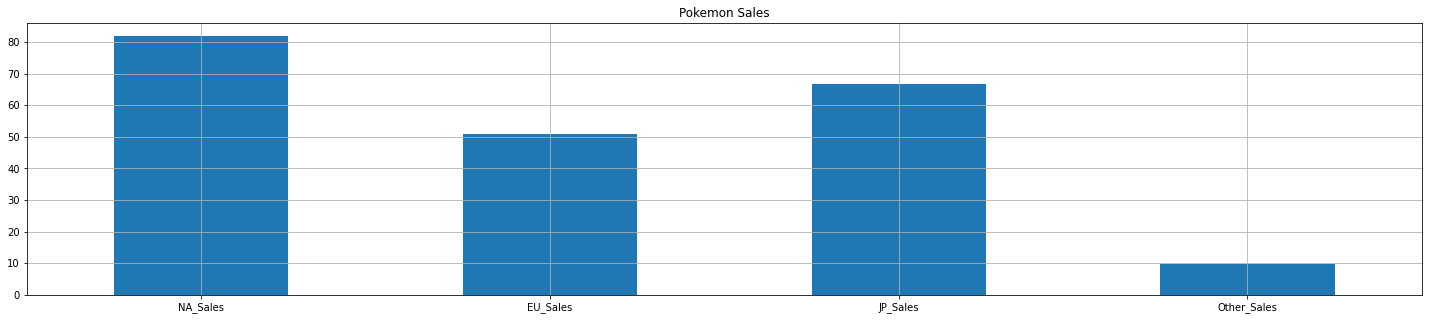

In [ ]:
games[games['Name'].str.contains("Pokemon")][['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().plot(kind='bar', title = 'Pokemon Sales', figsize = (25,5), rot=0, grid=True,)

Sembra proprio che non sia vero che i giochi Pokemon vendono di più nella loro terra natale, questo potrebbe essere anche solo a causa della grande differenza di numero di abitanti tra le diverse regioni geografiche oppure potrebbe essere influenzato da altri fattori.

## Correlazioni

Chiediamoci se c'è qualche correlazione tra le nostre features, poiché è una misura quantitativa che descrive l'intensità dell'associazione (o relazione) tra le variabili e ci permette di prevedere come si comporterà un insieme al variare dell'altro.

I tipi di associazioni sono:
- **Associazione positiva**: al crescere di un insieme, cresce anche l'altro (valore vicino a 1)
- **Associazione negativa**: al crescere di un insieme, l'altro diminuisce (valore vicino a -1)
- **Nessuna associazione**: non esiste una correlazione tra i due insiemi (valore uguale a 0)

Inoltre esistono tre "gradi" di correlazione: debole, media, forte.

#### Le vendite nei diversi paesi sono correlate tra loro?

Cerchiamo di capire se c'è una qualche correlazione tra le vendite in NA e le vendite in EU, JP e Other:

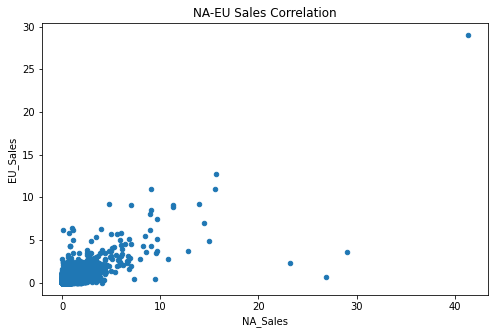

In [ ]:
games.plot.scatter(x='NA_Sales', y='EU_Sales', title = 'NA-EU Sales Correlation', figsize=(8,5))

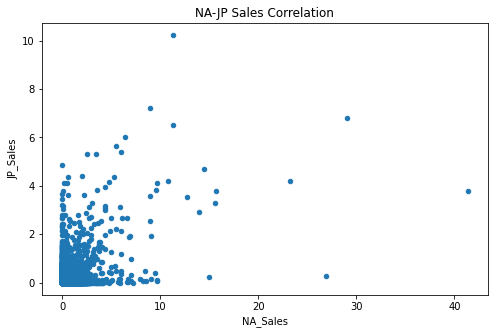

In [ ]:
games.plot.scatter(x='NA_Sales', y='JP_Sales', title = 'NA-JP Sales Correlation', figsize=(8,5))

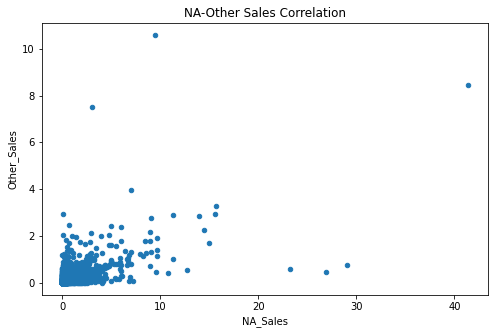

In [ ]:
games.plot.scatter(x='NA_Sales', y='Other_Sales', title = 'NA-Other Sales Correlation', figsize=(8,5))

Sembrerebbe esserci una correlazione positiva media/forte tra le vendite in Nord America e quelle negli altri paesi

#### Le vendite nei diversi paesi e le vendite globali?

Controlliamo se esiste una correlazione tra le vendite a livello globale e quelle delle diverse regioni geografiche

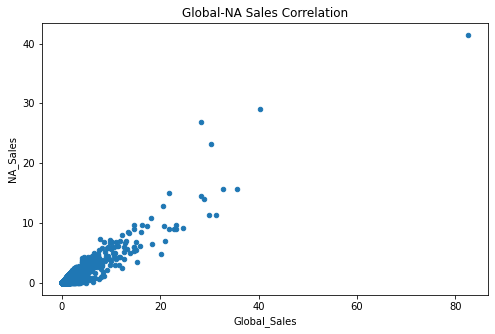

In [ ]:
games.plot.scatter(x='Global_Sales', y='NA_Sales', title = 'Global-NA Sales Correlation', figsize=(8,5))

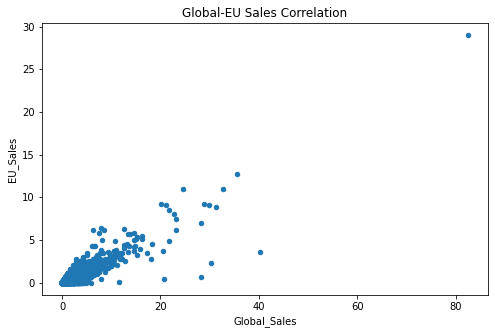

In [ ]:
games.plot.scatter(x='Global_Sales', y='EU_Sales', title = 'Global-EU Sales Correlation', figsize=(8,5))

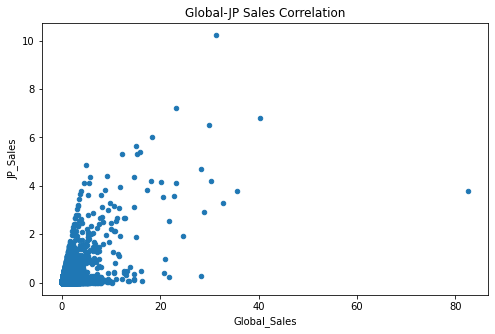

In [ ]:
games.plot.scatter(x='Global_Sales', y='JP_Sales', title = 'Global-JP Sales Correlation', figsize=(8,5))

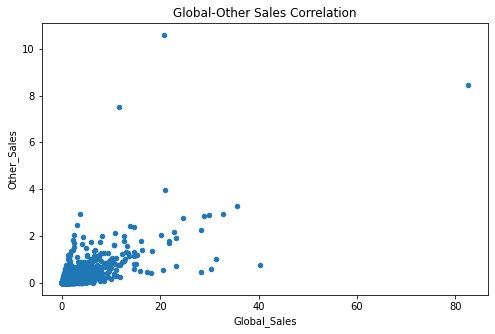

In [ ]:
games.plot.scatter(x='Global_Sales', y='Other_Sales', title = 'Global-Other Sales Correlation', figsize=(8,5))

Sembrerebbe esserci anche una correlazione positiva media/forte tra le vendite globali e quelle dei diversi paesi, soprattutto tra le vendite globali e quelle in Nord America

Questo potrebbe essere semplicemente a causa dell'elevato numero di abitanti in Nord America rispetto alle altre regioni geografiche prese in considerazione.

#### Il voto della critica influisce sulle vendite globali?

Chiediamoci ora se il voto attribuito dalla critica a un determinato titolo influisce sulle sue vendite

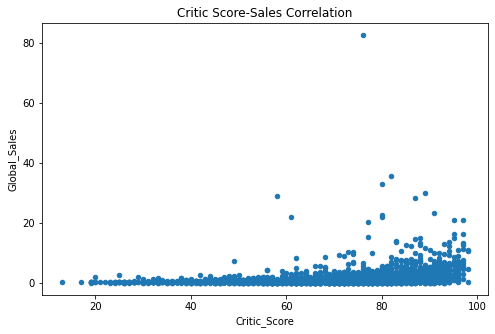

In [ ]:
games_no_meanScore.plot.scatter(x='Critic_Score', y='Global_Sales', title = 'Critic Score-Sales Correlation', figsize=(8,5))

Il voto della critica sembrerebbe influenzare minimamente le vendite globali di un gioco e maggiormente per voti superiori al 60

#### Il voto degli utenti influisce sulle vendite?

In [ ]:
# Per trasformare il voto in centesimi
games_no_meanScore['User_Score'] = games_no_meanScore['User_Score'].apply(lambda x:(x*10))

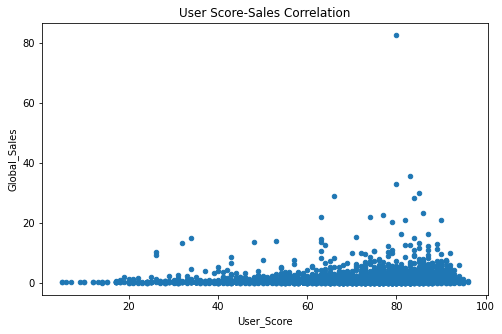

In [ ]:
games_no_meanScore.plot.scatter(x='User_Score', y='Global_Sales', title = 'User Score-Sales Correlation', figsize=(8,5))

Anche in questo caso il voto degli utenti sembra influenzare minimamente le vendite gloabli e maggiormente per voti superiori al 60 (6)

#### Verifichiamo le ipotesi di correlazione

Per verificare le ipotesi di correlazione, calcoliamo l'**indice di correlazione di Pearson**: 

In statistica, l'indice di correlazione di Pearson (anche detto coefficiente di correlazione lineare) tra due variabili statistiche è un indice che esprime un'eventuale relazione di linearità tra esse. Ha un valore compreso tra +1 e -1, dove +1 corrisponde alla perfetta correlazione lineare positiva, 0 corrisponde a un'assenza di correlazione lineare e -1 corrisponde alla perfetta correlazione lineare negativa.

In [ ]:
# Dataset con i valori medi per i voti della critica e degli utenti
corr1 = games.corr(method='pearson')
corr1

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
Year_of_Release,1.000000,-0.092096,0.004054,-0.168237,0.037737,-0.076113,0.005940,0.110676,-0.130618,0.086278
NA_Sales,-0.092096,1.000000,0.765293,0.449760,0.638622,0.941004,0.185138,0.227216,0.066011,0.189036
EU_Sales,0.004054,0.765293,1.000000,0.435171,0.722744,0.901221,0.194714,0.244658,0.048850,0.249727
JP_Sales,-0.168237,0.449760,0.435171,1.000000,0.291075,0.612431,0.091380,0.107943,0.075077,0.045214
Other_Sales,0.037737,0.638622,0.722744,0.291075,1.000000,0.749196,0.184916,0.234397,0.053167,0.223003
Global_Sales,-0.076113,0.941004,0.901221,0.612431,0.749196,1.000000,0.201081,0.248664,0.071925,0.216409
Critic_Score,0.005940,0.185138,0.194714,0.091380,0.184916,0.201081,1.000000,0.425441,0.499061,0.245510
Critic_Count,0.110676,0.227216,0.244658,0.107943,0.234397,0.248664,0.425441,1.000000,0.172548,0.341004
User_Score,-0.130618,0.066011,0.048850,0.075077,0.053167,0.071925,0.499061,0.172548,1.000000,0.027154
User_Count,0.086278,0.189036,0.249727,0.045214,0.223003,0.216409,0.245510,0.341004,0.027154,1.000000


In [ ]:
# Dataset con valori nulli per voti della critica e utenti rimossi
corr2 = games_no_meanScore.corr(method='pearson')
corr2

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
Year_of_Release,1.000000,-0.020206,0.038221,-0.041301,0.038981,0.002726,-0.010866,0.195947,-0.248768,0.196246
NA_Sales,-0.020206,1.000000,0.840033,0.467112,0.727126,0.955489,0.233351,0.283027,0.086401,0.244524
EU_Sales,0.038221,0.840033,1.000000,0.518741,0.716502,0.938684,0.212239,0.264407,0.055724,0.282647
JP_Sales,-0.041301,0.467112,0.518741,1.000000,0.394229,0.612527,0.146159,0.167471,0.127127,0.072438
Other_Sales,0.038981,0.727126,0.716502,0.394229,1.000000,0.804507,0.191095,0.238482,0.057255,0.239197
Global_Sales,0.002726,0.955489,0.938684,0.612527,0.804507,1.000000,0.237017,0.289366,0.088578,0.262963
Critic_Score,-0.010866,0.233351,0.212239,0.146159,0.191095,0.237017,1.000000,0.392588,0.580571,0.264543
Critic_Count,0.195947,0.283027,0.264407,0.167471,0.238482,0.289366,0.392588,1.000000,0.194164,0.362325
User_Score,-0.248768,0.086401,0.055724,0.127127,0.057255,0.088578,0.580571,0.194164,1.000000,0.018992
User_Count,0.196246,0.244524,0.282647,0.072438,0.239197,0.262963,0.264543,0.362325,0.018992,1.000000


Per evidenziare meglio le correlazioni possiamo rappresentare la tabella attraverso una heat map

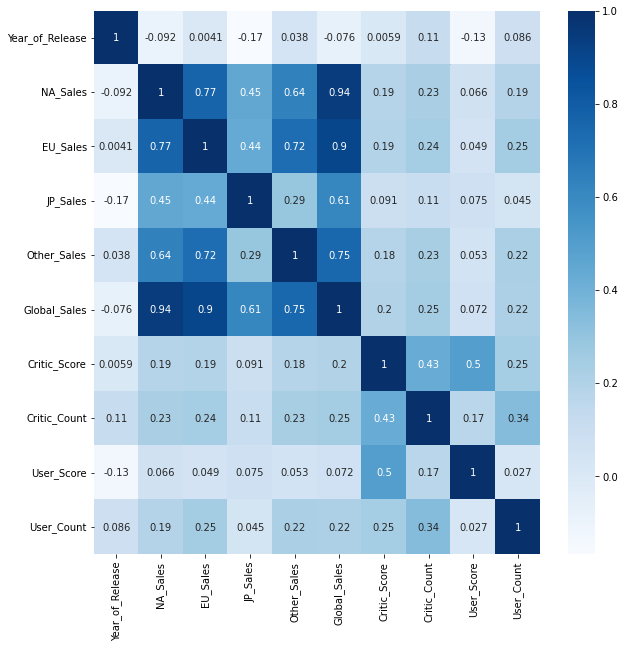

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sb.heatmap(corr1, cmap="Blues", annot=True, ax=ax)

Sembrerebbe esserci una correlazione abbastanza importante tra le diverse regioni di vendita, principalmente possiamo notare come sia presente un'importante correlazione tra le vendite gloabli e quelle in Nord America

## Test

### La somma delle vendite in NA, EU, JP e Other è uguale alle Vendite Globali?

Abbiamo notato che per alcune tuple del dataset la somma delle vendite in NA, EU, JP e Other differisce dal valore presente in Global, quindi per iniziare eseguiamo un t-test per verificare se la somma delle vendite (NA, EU, JP, Other) differisce in modo significativo dalla feature Global_Sales.

Definiamo quindi le seguenti ipotesi:

- H0: La media della somma delle vendite è uguale a quella delle vendite globali
- HA: La media della somma delle vendite differisce da quella delle vendite globali

In [ ]:
# Creazione di una colonna per contenere il risultato della somma di NA/JP/EU/Other_Sales
games['Calc_Global_Sales'] = games[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)

In [ ]:
shuffle = games.sample(frac = 1)

Devono essere verificate due importanti condizioni:
- La distribuzione della popolazione deve essere normale e il campione deve essere ampio (>= 30)
- La dimensione della popolazione deve essere almeno 10 volte superiore a quella del campione (10n < N)

Questo per garantire che il campione sia tratto in modo indipendente.

Entrambe le condizioni sono verificate, quindi possiamo continuare con il test.

Fissiamo un livello di confidenza del 95%, quindi un livello di significatività dello 0.05

Eseguiamo un t-test a due code per determinare se esiste una relazione tra le variabili in entrambe le direzioni 

In [ ]:
t_statistic, p_value = stats.ttest_1samp(a= shuffle['Calc_Global_Sales'].values[0:1000], popmean= shuffle['Global_Sales'].mean(), alternative='two-sided')
print(t_statistic)
print(p_value)
print("\nVisto che il p_value è maggiore del livello di significiatività prefissato (0.05), allora ACCETTIAMO l'ipotesi nulla." 
      if p_value > 0.05 
      else "\nVisto che il p_value è minore del livello di significiatività prefissato (0.05), allora RIFIUTIAMO l'ipotesi nulla.")

0.23865606585736931
0.8114212330003042

Visto che il p_value è maggiore del livello di significiatività prefissato (0.05), allora ACCETTIAMO l'ipotesi nulla.


Controlliamo ora con l'aiuto di un box-plot

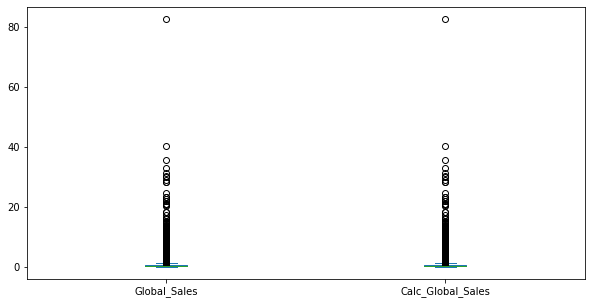

In [ ]:
games[['Global_Sales', 'Calc_Global_Sales']].plot(kind='box', figsize=(10,5))

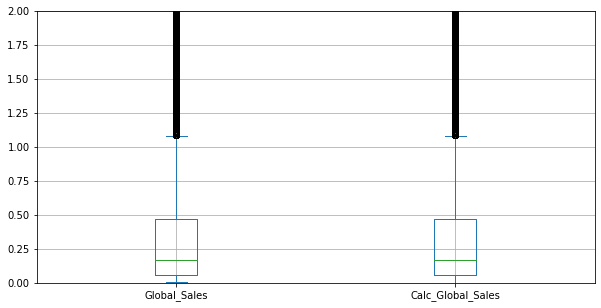

In [ ]:
games[['Global_Sales', 'Calc_Global_Sales']].plot(kind='box', figsize=(10,5), ylim=(0,2), grid=True)

### La media delle vendite globali della PS2, DS e Wii tra il 2000 ed il 2010 è maggiore di quella delle altre piattaforme?

Vogliamo verificare l'ipotesi secondo la quale le piattaforme PS2, DS e Wii abbiano venduto di più rispetto alle altre piattaforme, quindi definiamo le seguenti ipotesi:

- H0: La media delle vendite gloabli delle piattaforme PS2, DS e Wii è maggiore rispetto a quella delle altre piattaforme
- HA: La media delle vendite gloabli delle piattaforme PS2, DS e Wii è minore rispetto a quella delle altre piattaforme

Devono essere verificate due importanti condizioni:
- La distribuzione della popolazione deve essere normale e il campione deve essere ampio (>= 30)
- La dimensione della popolazione deve essere almeno 10 volte superiore a quella del campione (10n < N)

Questo per garantire che il campione sia tratto in modo indipendente.

In [ ]:
print(shuffle['Name'][shuffle['Year_of_Release'] >= 2000][shuffle['Year_of_Release'] <= 2010].count())

10668


La popolazione tra il 2000 ed il 2010 è di 10668 elementi, quindi per garantire entrambe le condizioni possiamo selezionare un massimo di 300 elementi per ogni piattaforma (PS2, DS, Wii) per arrivare ad un campione di 900 elementi, così da poter continuare con il test

Fissiamo un livello di confidenza del 95%, quindi un livello di significatività dello 0.05

In [ ]:
ps2 = shuffle['Global_Sales'][shuffle['Platform'] == 'PS2'][shuffle['Year_of_Release'] >= 2000][shuffle['Year_of_Release'] <= 2010].values[0:300]
ds = shuffle['Global_Sales'][shuffle['Platform'] == 'DS'][shuffle['Year_of_Release'] >= 2000][shuffle['Year_of_Release'] <= 2010].values[0:300]
wii = shuffle['Global_Sales'][shuffle['Platform'] == 'Wii'][shuffle['Year_of_Release'] >= 2000][shuffle['Year_of_Release'] <= 2010].values[0:300]

campione = np.concatenate((ps2, ds, wii), axis=None)
popolazione = shuffle['Global_Sales'][shuffle['Platform'] != 'PS2'][shuffle['Platform'] != 'DS'][shuffle['Platform'] != 'Wii'][shuffle['Year_of_Release'] >= 2000][shuffle['Year_of_Release'] <= 2010]

Eseguiamo un test a una coda per determinare se esiste una relazione tra le variabili in un'unica direzione (maggiore) 

In [ ]:
t_statistic, p_value = stats.ttest_1samp(a= campione, popmean= popolazione.mean(), alternative='less')
print(t_statistic)
print(p_value)
print("\nVisto che il p_value è maggiore del livello di significiatività prefissato (0.05), allora ACCETTIAMO l'ipotesi nulla." 
      if p_value > 0.05 
      else "\nVisto che il p_value è minore del livello di significiatività prefissato (0.05), allora RIFIUTIAMO l'ipotesi nulla.")

0.9976967235810603
0.8406525486698556

Visto che il p_value è maggiore del livello di significiatività prefissato (0.05), allora ACCETTIAMO l'ipotesi nulla.


### La media delle vendite globali è uguale a quella in Nord America?

Definiamo le ipotesi:
- H0: la media delle vendite globali è uguale a quella in Nord America
- HA: la media delle vendite globali è diversa da quella in Nord America

Devono essere verificate due importanti condizioni:

- La distribuzione della popolazione deve essere normale e il campione deve essere ampio (>= 30)
- La dimensione della popolazione deve essere almeno 10 volte superiore a quella del campione (10n < N)

Questo per garantire che il campione sia tratto in modo indipendente.

Entrambe le condizioni sono verificate, quindi possiamo continuare con il test.

Fissiamo un livello di confidenza del 95%, quindi un livello di significatività dello 0.05

In [ ]:
t_statistic, p_value = stats.ttest_1samp(a= shuffle['Global_Sales'].values[0:1000], popmean= shuffle['NA_Sales'].mean(), alternative='two-sided')
print(t_statistic)
print(p_value)
print("\nVisto che il p_value è maggiore del livello di significiatività prefissato (0.05), allora ACCETTIAMO l'ipotesi nulla." 
      if p_value > 0.05 
      else "\nVisto che il p_value è minore del livello di significiatività prefissato (0.05), allora RIFIUTIAMO l'ipotesi nulla.")

7.744277319609982
2.3515339573534916e-14

Visto che il p_value è minore del livello di significiatività prefissato (0.05), allora RIFIUTIAMO l'ipotesi nulla.


Chiediamoci allora se la media delle vendite globali è maggiore rispetto a quella in Nord America

Definiamo le ipotesi:
- H0: la media delle vendite globali è maggiore di quella in Nord America
- HA: la media delle vendite globali è minore di quella in Nord America

Test a una coda per determinare se esiste una relazione tra le variabili in un'unica direzione (< o >) 

In [ ]:
t_statistic, p_value = stats.ttest_1samp(a= shuffle['Global_Sales'].values[0:1000], popmean= shuffle['NA_Sales'].mean(), alternative='less')
print(t_statistic)
print(p_value)
print("\nVisto che il p_value è maggiore del livello di significiatività prefissato (0.05), allora ACCETTIAMO l'ipotesi nulla." 
      if p_value > 0.05 
      else "\nVisto che il p_value è minore del livello di significiatività prefissato (0.05), allora RIFIUTIAMO l'ipotesi nulla.")

7.744277319609982
0.9999999999999882

Visto che il p_value è maggiore del livello di significiatività prefissato (0.05), allora ACCETTIAMO l'ipotesi nulla.


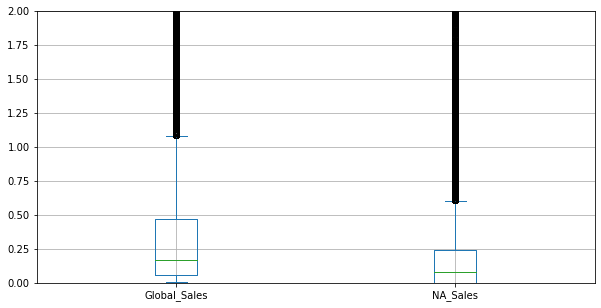

In [ ]:
games[['Global_Sales', 'NA_Sales']].plot(kind='box', figsize=(10,5), ylim=(0,2), grid=True)

## Metodi Predittivi

Cerchiamo attraverso l'allenamento e l'utilizzo di un modello di regressione lineare se esiste una relazione lineare tra le vendite globali e le vendite in Nord America:

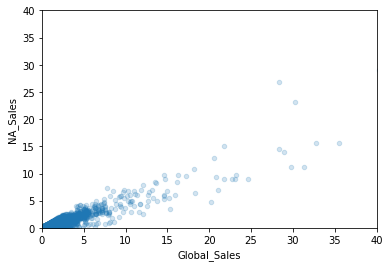

In [ ]:
games.plot(kind='scatter', x='Global_Sales', y='NA_Sales', alpha=0.2, xlim=(0,40), ylim=(0,40))

Sembrerebbe che le vendite globali e in NA siano correlate, verifichiamolo con il calcolo del coefficiente di correlazione di Pearson

In [ ]:
games[['Global_Sales', 'NA_Sales']].corr()

,Global_Sales,NA_Sales
Global_Sales,1.000000,0.941004
NA_Sales,0.941004,1.000000


Le vendite Globali e in Nord America sono fortemente correlate.

Vista l'elevata correlazione, ora possiamo passare all'implementazione e allenamento di un modello di regressione lineare.

Prima di tutto è necessario suddividere il dataset a disposizione in due gruppi:
- Training set: dati utilizzati per l'allenamento del modello di regressione
- Validation set: dati che utilizziamo per valutare il modello creato

In [ ]:
x= games[['Global_Sales']]
y= games['NA_Sales']

# Divisione randomica dei dati nei vari insiemi con una percentuale di 70 (Allenamento) -30 (Test)
X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size=0.3, random_state=1) 

print("X_valid: ", X_valid.shape)
print("X_train: ", X_train.shape) 

X_valid:  (4999, 1)
X_train:  (11664, 1)


In [ ]:
regressor = LinearRegression()  # istanzia il modello
lin_reg = regressor.fit(X_train, y_train)  # adatta il modello al nostro set di addestamento 

print("intercept: ", lin_reg.intercept_)
print("coefficient: ", lin_reg.coef_)

intercept:  -0.0011981739388669532
coefficient:  [0.49475817]


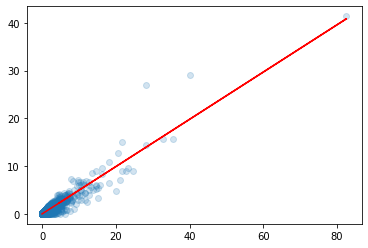

In [ ]:
plt.scatter(X_train, y_train, alpha=0.2)

y_hat = X_train * lin_reg.coef_ + lin_reg.intercept_
plt.plot(X_train, y_hat, color='r')

Adesso possiamo utilizzare il modello allenato per effettuare predizioni sull'insieme di validazione

In [ ]:
y_hat = regressor.predict(X_valid) # predizioni sul nostro set di collaudo
print(y_hat)

[0.01859215 0.7904149  0.1422817  ... 0.01859215 0.00869699 0.05322522]


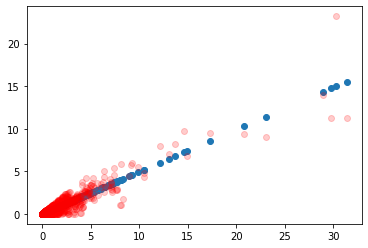

In [ ]:
plt.scatter(X_valid, y_hat)
plt.scatter(X_valid, y_valid, c='r', alpha=0.2)

Stimiamo ora la precisione del modello che abbiamo allenato.

Abbiamo visto che esistono 3 metriche per valutare i modelli a regressione di machine learning:
- **MAE** - Mean Absolute Error: **Errore assoluto medio**
- **MSE** - Mean Squared Error: **Errore quadratico medio**
- **RMSE** - Root of Mean Squared Error: **Radice dell'errore quadratico medio**

In [ ]:
# Predizioni sul validation set (y_pred)
y_pred = regressor.predict(X_valid)

print ('MAE:', metrics.mean_absolute_error(y_valid, y_pred))
print ('MSE:', metrics.mean_squared_error(y_valid, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))

MAE: 0.10081934467784152
MSE: 0.06756178521862642
RMSE: 0.2599264996467779


Per capire se questi risultati sono buoni dobbiamo determinare il modello nullo, cioè il modello che rappresenta in modo efficace il fatto di tirare a indovinare più e più volte il risultato atteso e vedere l'efficacia di quest'ultimo.

Essendo un modello di regressione possiamo sostituire tutti i valori della feature NA_Sales con la media sull'intero dataset.

In [ ]:
mean_NASales = games['NA_Sales'].mean()
print("mean_NA_Sales: ", mean_NASales)

# Creo la nuova x con lo stesso numero di campioni del dataset originale, e con tutti i valori uguali al 
# valore medio del numero di vendite appena calcolato
null_model_y = [mean_NASales] * games.shape[0]

mean_NA_Sales:  0.26359779151415424


In [ ]:
# Valutiamo il modello nullo
print ('MODELLO NULLO')
print ('MAE:', metrics.mean_absolute_error(y, null_model_y))
print ('MSE:', metrics.mean_squared_error(y, null_model_y))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y, null_model_y)))

MODELLO NULLO
MAE: 0.3077009869015204
MSE: 0.6635634767087996
RMSE: 0.8145940563917708


Possiamo facilmente notare che fortunatamente gli errori sono più grandi rispetto a quelli del modello di regressione lineare, questo ci fa capire che abbiamo fatto meglio che tirare a caso...